In [33]:
import mysql.connector
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Connection to the database
host = creds[2]
user = creds[0]
password = creds[1]
database = creds[3]
port = creds[4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
882


In [2]:
alertP1 = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)
alertP1
alertP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_DOENTE            10150 non-null  object
 1   PROCESSO             10150 non-null  object
 2   COD_REFERENCIA       10150 non-null  object
 3   COD_PZ               10150 non-null  object
 4   COD_UNID_SAUDE_PROV  10150 non-null  int64 
 5   UNID_PROV            10150 non-null  object
 6   TIPO_UNID            10150 non-null  object
 7   PROVENIENCIA         10150 non-null  object
 8   COD_CTH_PRIOR        10150 non-null  object
 9   CTH_PRIOR            10150 non-null  object
 10  COD_MOTIVO_RECUSA    10150 non-null  int64 
 11  DES_MOTIVO_RECUSA    10150 non-null  object
 12  COD_ESPECIALIDADE    10150 non-null  int64 
 13  DES_ESPECIALIDADE    10150 non-null  object
 14  agrupadora           10150 non-null  object
 15  OUTRA_ENTIDADE       10150 non-null  int64 
 16  DATA

In [25]:
print(alertP1["COD_MOTIVO_RECUSA"].nunique())
#number of empty values
print(alertP1["COD_MOTIVO_RECUSA"].isna().sum())

#percentage of empty cells
print(alertP1["COD_MOTIVO_RECUSA"].isnull().sum()/alertP1["COD_MOTIVO_RECUSA"].shape[0] * 100)

#the frequency of the values
print(alertP1["COD_MOTIVO_RECUSA"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

#sns.countplot(x = 'COD_MOTIVO_RECUSA',
                #data = alertP1,
                #order = alertP1['COD_MOTIVO_RECUSA'].value_counts().index)




21
0
0.0
0     5189
1     1474
7     1419
53     857
19     335
20     224
18     193
15     114
2      114
10     103
13      31
14      24
12      20
8       19
16      19
6       10
52       1
51       1
3        1
50       1
54       1
Name: COD_MOTIVO_RECUSA, dtype: int64


In [26]:
print(alertP1["DES_MOTIVO_RECUSA"].nunique())

#number of empty values
print(alertP1["DES_MOTIVO_RECUSA"].isna().sum())

#percentage of empty cells
print(alertP1["DES_MOTIVO_RECUSA"].isnull().sum()/alertP1["DES_MOTIVO_RECUSA"].shape[0] * 100)

#the frequency of the values
print(alertP1["DES_MOTIVO_RECUSA"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

#sns.countplot(x = 'COD_MOTIVO_RECUSA',
                #data = alertP1,
                #order = alertP1['COD_MOTIVO_RECUSA'].value_counts().index)
    

21
0
0.0
                                                             5189
Sem relatorio clinico                                        1474
Sem marcacao                                                 1419
Falta Injustificada do Utente                                 857
Referencia Duplicada                                          335
O Doente Faleceu                                              224
O Doente ja teve Consulta com outra referencia                193
Consulta Marcada. O Doente Desistiu                           114
Utente fora da area                                           114
Enviado ao Medico Assistente                                  103
Marcada sem Referencia                                         31
Consulta Marcada. O Doente Faltou                              24
Marcada em Subsequentes                                        20
Enviado para outra Especialidade                               19
O Doente Desistiu                                              19
S

8
0
0.0
20420    8974
20425     409
20422     360
20421     259
20435      71
20426      60
20427      15
20429       2
Name: COD_ESPECIALIDADE, dtype: int64


<AxesSubplot:xlabel='COD_ESPECIALIDADE', ylabel='count'>

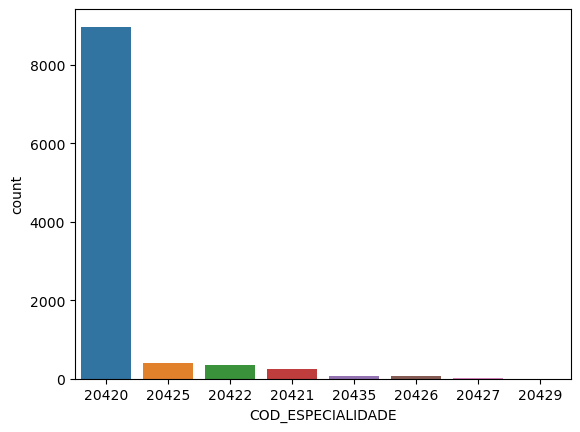

In [32]:
print(alertP1["COD_ESPECIALIDADE"].nunique())

#number of empty values
print(alertP1["COD_ESPECIALIDADE"].isna().sum())

#percentage of empty cells
print(alertP1["COD_ESPECIALIDADE"].isnull().sum()/alertP1["COD_ESPECIALIDADE"].shape[0] * 100)

#the frequency of the values
print(alertP1["COD_ESPECIALIDADE"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

sns.countplot(x = 'COD_ESPECIALIDADE',
                data = alertP1,
                order = alertP1['COD_ESPECIALIDADE'].value_counts().index)

8
0
0.0
NEUROLOGIA                             8974
EPILEPSIA                               409
NEUROLOGIA DO COMPORTAMENTO             360
DOENCAS DO MOVIMENTO                    259
DVC                                      71
NEUROLOGIA - ESCLEROSE MULTIPLA          60
APOIO DOENCAS NEUROLOGICAS CRONICAS      15
NEUROLOGIA - CEFALEIAS                    2
Name: DES_ESPECIALIDADE, dtype: int64


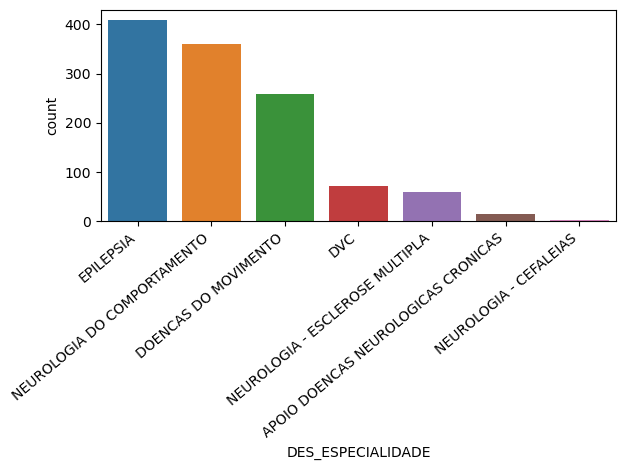

In [39]:
print(alertP1["DES_ESPECIALIDADE"].nunique())

#number of empty values
print(alertP1["DES_ESPECIALIDADE"].isna().sum())

#percentage of empty cells
print(alertP1["DES_ESPECIALIDADE"].isnull().sum()/alertP1["DES_ESPECIALIDADE"].shape[0] * 100)

#the frequency of the values
print(alertP1["DES_ESPECIALIDADE"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

ax=sns.countplot(x = 'DES_ESPECIALIDADE',
                data = alertP1,
                order = alertP1['DES_ESPECIALIDADE'].value_counts().iloc[1:].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

1
0
0.0
NEUROLOGIA    10150
Name: agrupadora, dtype: int64


<AxesSubplot:xlabel='agrupadora', ylabel='count'>

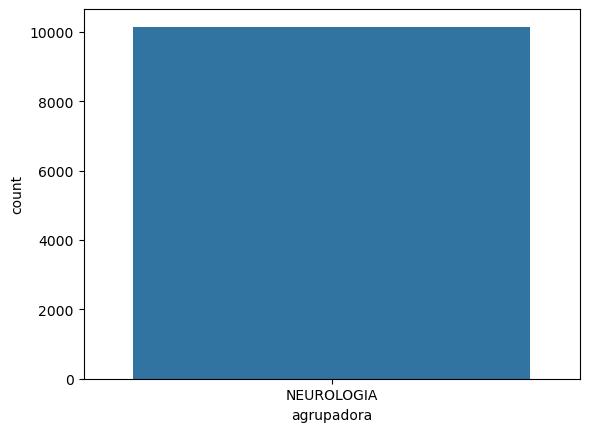

In [40]:
print(alertP1["agrupadora"].nunique())

#number of empty values
print(alertP1["agrupadora"].isna().sum())

#percentage of empty cells
print(alertP1["agrupadora"].isnull().sum()/alertP1["agrupadora"].shape[0] * 100)

#the frequency of the values
print(alertP1["agrupadora"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

sns.countplot(x = 'agrupadora',
                data = alertP1,
                order = alertP1['agrupadora'].value_counts().index)